In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('hour.csv')

In [5]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
df['dteday']=pd.to_datetime(df.dteday)

In [9]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [12]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
df.drop('instant',axis=1,inplace=True)

In [15]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [16]:
df.drop('dteday',axis=1,inplace=True)

In [64]:
x=df.iloc[:,0:-1]

In [65]:
y=df.iloc[:,-1].values.reshape(-1,1)

In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [67]:
lr=LinearRegression()

In [68]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
lr.score(xtrain,ytrain)

1.0

In [70]:
r2_score(lr.predict(xtest),ytest)

1.0

In [71]:
pred_lr=lr.predict(xtest)

In [72]:
xtrain.shape

(13034, 14)

In [73]:
xtest.shape

(4345, 14)

In [74]:
mean_squared_error(pred_lr,ytest)

5.384294505921399e-31

In [75]:
dtr=DecisionTreeRegressor()

In [76]:
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [77]:
dtr.score(xtrain,ytrain)

1.0

In [78]:
pred_dtr=dtr.predict(xtest)

In [79]:
r2_score(pred_dtr,ytest)

0.9989460545709157

In [80]:
cv=cross_val_score(lr,x,y,cv=15,scoring='r2')

In [81]:
cv.mean()

1.0

In [82]:
cv.std()

0.0

In [83]:
cvr=cross_val_score(dtr,x,y,cv=15,scoring='r2')

In [84]:
cvr.mean()

0.9989996271253065

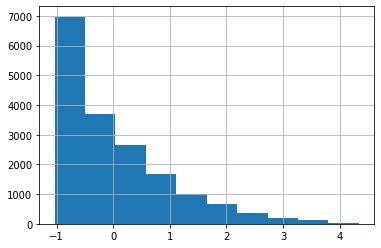

In [85]:
df['cnt'].hist()

In [54]:
col=df.columns

In [55]:
col

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [56]:
for m in col:
    print(m, ':', (len(df[m].unique())) )

season : 4
yr : 2
mnth : 12
hr : 24
holiday : 2
weekday : 7
workingday : 2
weathersit : 4
temp : 50
atemp : 65
hum : 89
windspeed : 30
casual : 322
registered : 776
cnt : 869


In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
ss=StandardScaler()

In [62]:
for m in col:
    df[m]=ss.fit_transform(df[m].values.reshape(-1,1))

In [63]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,-1.356634,-1.005134,-1.610438,-1.670004,-0.172112,1.493891,-1.4669,-0.665193,-1.334648,-1.093281,0.947372,-1.553889,-0.662755,-0.930189,-0.956339
1,-1.356634,-1.005134,-1.610438,-1.525374,-0.172112,1.493891,-1.4669,-0.665193,-1.438516,-1.181732,0.895539,-1.553889,-0.561343,-0.804655,-0.824022
2,-1.356634,-1.005134,-1.610438,-1.380744,-0.172112,1.493891,-1.4669,-0.665193,-1.438516,-1.181732,0.895539,-1.553889,-0.622190,-0.837690,-0.868128
3,-1.356634,-1.005134,-1.610438,-1.236115,-0.172112,1.493891,-1.4669,-0.665193,-1.334648,-1.093281,0.636370,-1.553889,-0.662755,-0.950010,-0.972879
4,-1.356634,-1.005134,-1.610438,-1.091485,-0.172112,1.493891,-1.4669,-0.665193,-1.334648,-1.093281,0.636370,-1.553889,-0.723603,-1.009474,-1.039037


In [86]:
import pickle

In [87]:
bike_model=pickle.dumps(cvr)